[**Demo %s**](#demo-nonlinear2d-mems)

All we need to define are $\phi$ from {eq}`nonlinpdepde` for the PDE, and a trivial zero function for the boundary condition.

In [2]:
lambda = 1.5;
phi = @(X, Y, U, Ux, Uxx, Uy, Uyy) Uxx + Uyy - lambda ./ (U + 1).^2;
g = @(x, y) zeros(size(x));

Here is the solution for $m=15$, $n=8$.

In [3]:
u = elliptic(phi, g, 15, [0, 2.5], 8, [0, 1]);
disp(sprintf("solution at (2, 0.6) is %.7f", u(2, 0.6)))

solution at (2, 0.6) is -0.2264594


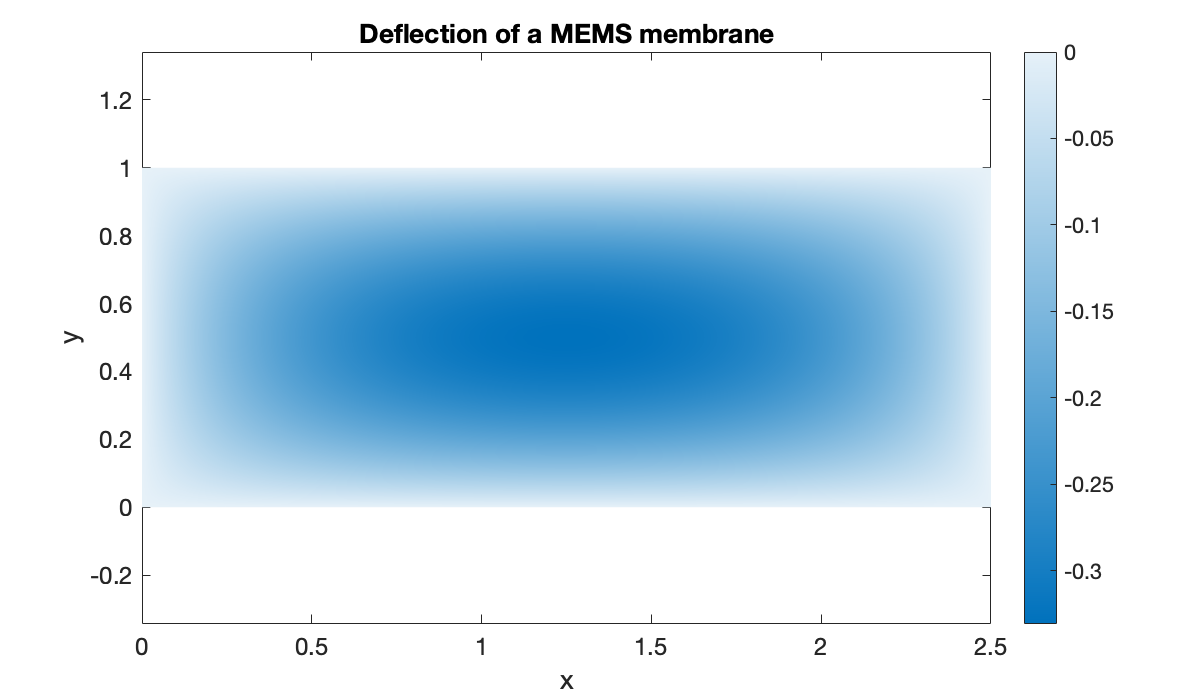

In [4]:
x = linspace(0, 2.5, 91);
y = linspace(0, 1, 51);
[mtx, X, Y] = tensorgrid(x, y);
clf,  pcolor(x, y, mtx(u)')
colormap(flipud(sky)),  shading interp,  colorbar
axis equal
xlabel("x"),  ylabel("y")
title("Deflection of a MEMS membrane")

In the absence of an exact solution, how can we be confident that the solution is accurate? First, the Levenberg iteration converged without issuing a warning, so we should feel confident that the discrete equations were solved. Assuming that we encoded the PDE correctly, the remaining source of error is truncation from the discretization. We can estimate that by refining the grid a bit and seeing how much the numerical solution changes.

In [5]:
x_test = linspace(0, 2.5, 6);
y_test = linspace(0, 1 , 5);
mtx_test = tensorgrid(x_test, y_test);
format long
mtx_test(u)

ans = 6×5 double
                   0   0.000000000000000   0.000000000000000   0.000000000000000                   0
   0.000000000000000  -0.174520738821158  -0.236562036535841  -0.174520738821158   0.000000000000000
   0.000000000000000  -0.232549828809534  -0.320497790014285  -0.232549828809534   0.000000000000000
   0.000000000000000  -0.232549828809534  -0.320497790014284  -0.232549828809534   0.000000000000000
   0.000000000000000  -0.174520738821157  -0.236562036535841  -0.174520738821157   0.000000000000000
                   0   0.000000000000000   0.000000000000000   0.000000000000000                   0

In [6]:
u = elliptic(phi, g, 25, [0, 2.5], 14, [0, 1]);
mtx_test(u)

ans = 6×5 double
                   0  -0.000000000000000   0.000000000000000  -0.000000000000000                   0
  -0.000000000000000  -0.174516201277333  -0.236553894009285  -0.174516201277333  -0.000000000000000
  -0.000000000000000  -0.232550238149297  -0.320474598914872  -0.232550238149296  -0.000000000000000
  -0.000000000000000  -0.232550238149297  -0.320474598914872  -0.232550238149297  -0.000000000000000
  -0.000000000000000  -0.174516201277334  -0.236553894009286  -0.174516201277333  -0.000000000000000
                   0   0.000000000000000   0.000000000000000  -0.000000000000000                   0

The original solution seems to be accurate to about four digits.